In [2]:
# 1st step - importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 2nd step - reading the data

df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# 3rd step - select important col - not necce

cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


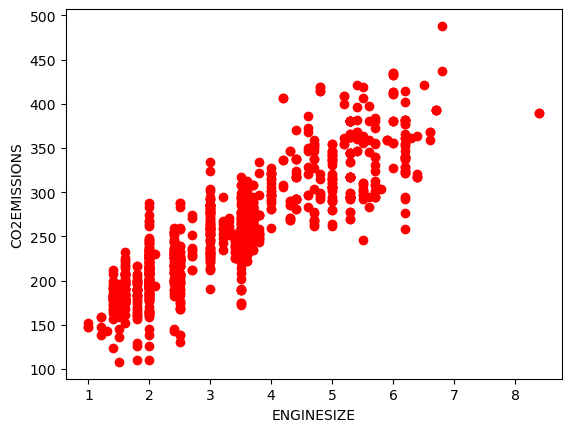

In [5]:
#  plotting the data -- not necessary info kind of thing

plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS ,color ='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [6]:
# 4th step - splitting the data -- 80 % for training and 20 % for testing

msk = np.random.rand(len(cdf)) <= 0.80
train = cdf[msk]
test = cdf[~msk]

In [7]:
# not nece for info kind of thing

train.shape

(861, 4)

In [8]:
# not nece for info kind of thing
test.shape

(206, 4)

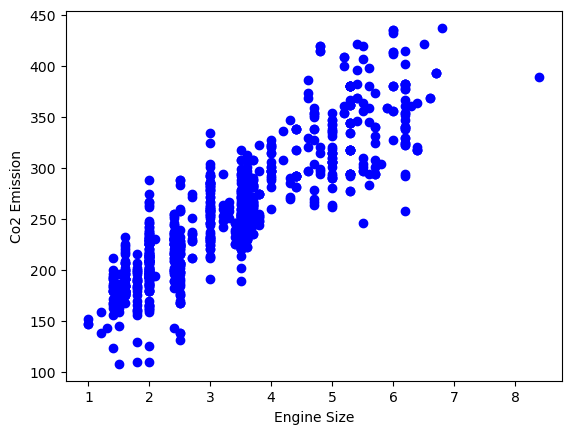

In [9]:
# not nece for info kind of thing -- train data distrubution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.show()


In [10]:
# 5th step - converting into array 

x = np.asanyarray(train[['ENGINESIZE']])
y = np.asanyarray(train[['CO2EMISSIONS']])

In [11]:
# 6th step - importing linear model

from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y) # here model is ready

LinearRegression()

In [12]:
# step 7 -- coefficient and intercept

print('coefficient: ',regr.coef_)
print('intercept: ',regr.intercept_)

coefficient:  [[39.2993571]]
intercept:  [125.19602213]


Text(0, 0.5, 'Co2 Emission')

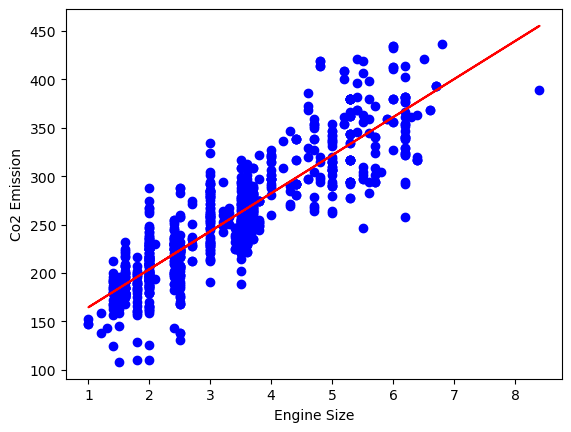

In [13]:
# step 8 - plotting -- straight line -- y = mx + c 
 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")

In [15]:
# step - 9 -- testing

test_x = np.asanyarray(test[['ENGINESIZE']]) # que
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual ans not predicted

In [16]:
# step --10 --predicting
# train >> test >> predict
# here 

predicted_y = regr.predict(test_x)

In [17]:
# step --11 -- mean absolute error --

print(f"MAE : {np.mean(np.absolute(predicted_y - test_y))}")

MAE : 26.13194470356304


In [18]:
# step - 12 - mean square error
print("MSE: %.2f" % np.mean((predicted_y - test_y)**2))

MSE: 1188.22


In [19]:
# step - 13 - check r2 score

from sklearn.metrics import r2_score

print(f"R2-score : {r2_score(test_y,predicted_y)}")

R2-score : 0.7250535124532937


In [20]:
# step - 14 -- test

regr.predict([[7.6]])

array([[423.87113611]])

In [21]:
regr.predict([[3.2]])

array([[250.95396486]])

In [22]:
regr.predict([[7.5]])

array([[419.9412004]])